<a href="https://colab.research.google.com/github/elenaporras-mx/Project7_AI/blob/main/project7_demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Demo Setup:** We will run a live demonstration of MCTS playing Tic-Tac-Toe. The MCTS agent uses the game’s rules to simulate random games from the current position to choose its moves.
- **Expectation:** Even with relatively few simulations per move, MCTS should play Tic-Tac-Toe optimally (i.e., never lose). We’ll visualize how the search tree grows and how the algorithm increasingly favors the correct moves.
- **Observation:** In early moves, the search is shallow and random, but as we give it more iterations, it will converge to the minimax-optimal move (which in Tic-Tac-Toe ensures at least a draw). This highlights how MCTS approximates lookahead reasoning via sampling.

In [ ]:
import numpy as np
import networkx as nx

# numpy import for math operations and random choices

class TicTacToe:
    def __init__(self):
        self.board = [' '] * 9  # create empty 3x3 board as flat list
        self.current_player = 'X'  # x always goes first

    def print_board(self):
        # display board as 3 rows with separators
        return "\n".join([" | ".join(self.board[i:i+3]) for i in range(0, 9, 3)])

    def legal_moves(self):
        # find all empty spaces on the board
        return [i for i in range(9) if self.board[i] == ' ']

    def make_move(self, idx):
        # attempt to place current player's symbol at position
        if self.board[idx] == ' ':
            self.board[idx] = self.current_player
            self.current_player = 'O' if self.current_player == 'X' else 'X'  # switch players
            return True
        return False  # move was invalid

    def check_winner(self):
        # all possible winning combinations
        wins = [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)]
        for a,b,c in wins:
            # check if any winning pattern is complete with same symbol
            if self.board[a] != ' ' and self.board[a] == self.board[b] == self.board[c]:
                return self.board[a]  # return winning player
        if ' ' not in self.board:
            return 'Draw'  # board full with no winner
        return None  # game still ongoing

In [ ]:
javascriptimport numpy as np

# numpy import for math operations and random choices

class TicTacToe:
    def __init__(self):
        self.board = [' '] * 9  # create empty 3x3 board as flat list
        self.current_player = 'X'  # x always goes first

    def print_board(self):
        # display board as 3 rows with separators
        return "\n".join([" | ".join(self.board[i:i+3]) for i in range(0, 9, 3)])

    def legal_moves(self):
        # find all empty spaces on the board
        return [i for i in range(9) if self.board[i] == ' ']

    def make_move(self, idx):
        # attempt to place current player's symbol at position
        if self.board[idx] == ' ':
            self.board[idx] = self.current_player
            self.current_player = 'O' if self.current_player == 'X' else 'X'  # switch players
            return True
        return False  # move was invalid

    def check_winner(self):
        # all possible winning combinations
        wins = [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)]
        for a,b,c in wins:
            # check if any winning pattern is complete with same symbol
            if self.board[a] != ' ' and self.board[a] == self.board[b] == self.board[c]:
                return self.board[a]  # return winning player
        if ' ' not in self.board:
            return 'Draw'  # board full with no winner
        return None  # game still ongoing

class MCTSNode:
    def __init__(self, state, parent=None, move=None):
        # monte carlo tree search node representation
        self.state = state  # game state at this node
        self.parent = parent  # parent node
        self.move = move  # move that led to this state
        self.children = []  # possible next moves
        self.visits = 0  # number of times visited
        self.wins = 0  # number of wins from this position

    def uct_score(self, c=1.41):
        # upper confidence bound calculation
        if self.visits == 0:
            return float('inf')  # unvisited nodes get priority
        # balance exploitation (win ratio) and exploration (visit ratio)
        return self.wins / self.visits + c * np.sqrt(np.log(self.parent.visits) / self.visits)

def simulate_random_game(start_state):
    # play out a random game from the given state
    game = TicTacToe()
    game.board = start_state.board[:]  # copy board state
    game.current_player = start_state.current_player
    while game.check_winner() is None:
        move = np.random.choice(game.legal_moves())  # pick random valid move
        game.make_move(move)
    return game.check_winner()  # return final result

def expand_node(node):
    # add all possible next states as children
    game = TicTacToe()
    game.board = node.state.board[:]
    game.current_player = node.state.current_player
    for move in game.legal_moves():
        game_copy = TicTacToe()
        game_copy.board = game.board[:]
        game_copy.current_player = game.current_player
        game_copy.make_move(move)  # create new state after move
        child = MCTSNode(game_copy, parent=node, move=move)
        node.children.append(child)

def select_best_child(node):
    # select child with highest uct score for exploration
    return max(node.children, key=lambda child: child.uct_score())

def backpropagate(path, winner, player):
    # update stats for all nodes in the path
    for node in path:
        node.visits += 1
        if winner == player:
            node.wins += 1  # full win
        elif winner == 'Draw':
            node.wins += 0.5  # half credit for draw

def mcts_search(root_state, simulations=100):
    # main monte carlo tree search algorithm
    root = MCTSNode(root_state)
    for _ in range(simulations):
        node = root
        path = [node]

        # selection - traverse tree to leaf using uct
        while node.children:
            node = select_best_child(node)
            path.append(node)

        # expansion - add children if node was visited before
        if node.visits > 0 and not node.children:
            expand_node(node)
            if node.children:
                node = np.random.choice(node.children)  # select random child
                path.append(node)

        # simulation - random playout from this position
        winner = simulate_random_game(node.state)

        # backpropagation - update stats for all nodes in path
        backpropagate(path, winner, root_state.current_player)

    return root



In [ ]:
# demo code - run mcts with 100 simulations on empty board
root_game = TicTacToe()
root_node = mcts_search(root_game, simulations=100)
move_stats = [(child.move, child.visits, round(child.wins, 1)) for child in root_node.children]
move_stats.sort()  # sort by move index

In [ ]:
# display results using pandas
import pandas as pd
df = pd.DataFrame(move_stats, columns=["Move", "Visits", "Wins"])
print(df)

In [ ]:
import networkx as nx

# helper function to create a visual representation of the monte carlo tree search
def visualize_mcts_tree(root_node, depth_limit=2):
   G = nx.DiGraph()  # create directed graph structure
   labels = {}  # dictionary to store node labels

   def add_nodes(node, depth=0, parent_id=None, node_id=[0]):
       if depth > depth_limit:
           return  # stop recursion if we hit depth limit

       current_id = node_id[0]  # use current counter value as unique node id
       # create label showing move position, visit count and win count
       label = f"{node.move if node.move is not None else 'root'}\nV:{node.visits},W:{round(node.wins,1)}"
       labels[current_id] = label  # store label for this node
       G.add_node(current_id)  # add node to graph

       if parent_id is not None:
           G.add_edge(parent_id, current_id)  # connect to parent if not root

       node_id[0] += 1  # increment counter for next node

       # recursively process all children
       for child in node.children:
           add_nodes(child, depth+1, current_id, node_id)

   # start recursive node addition from root
   add_nodes(root_node)

   pos = nx.spring_layout(G, seed=42)  # calculate node positions with fixed random seed
   plt.figure(figsize=(10, 6))  # create large enough figure
   # draw nodes and connections
   nx.draw(G, pos, with_labels=False, node_size=1500, node_color="lightblue", arrows=True)
   # add text labels to nodes
   nx.draw_networkx_labels(G, pos, labels, font_size=9)
   plt.title("MCTS Tree Visualization (depth ≤ 2)")  # add title
   plt.axis('off')  # hide axis
   plt.show()  # display the graph



In [ ]:
visualize_mcts_tree(root_node)

# After 100 sims!
Each node displays:

the move taken from its parent (root means it's the starting state),

number of visits (V),

and number of wins (W) for the root player.



In [ ]:
import matplotlib.pyplot as plt


Move 1: Player O


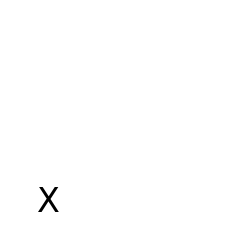

Move 2: Player O


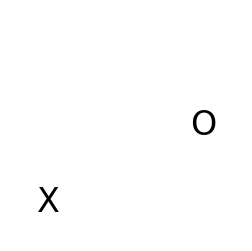

Move 3: Player O


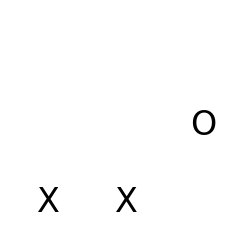

Move 4: Player O


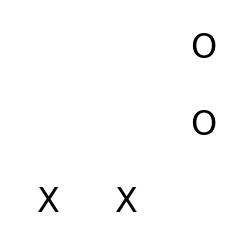

Move 5: Player O


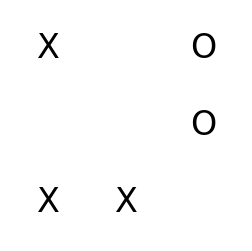

Move 6: Player O


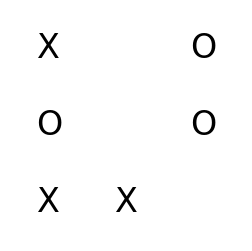

Move 7: Player O


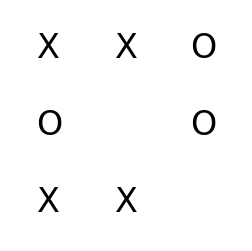

Move 8: Player O


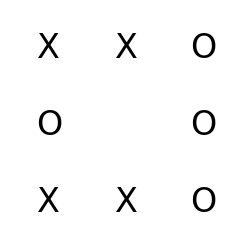

Game Result: O


In [ ]:
def display_board(board_state):
   # set up the tic-tac-toe grid visualization
   fig, ax = plt.subplots(figsize=(3, 3))
   ax.set_xticks([0.5, 1.5], minor=True)
   ax.set_yticks([0.5, 1.5], minor=True)
   ax.grid(which='minor', color='black', linewidth=2)

   # place X and O symbols in the grid
   for i in range(9):
       row, col = divmod(i, 3)
       symbol = board_state[i]
       ax.text(col + 0.5, 2.5 - row, symbol, fontsize=24, ha='center', va='center')

   # configure display settings
   ax.set_xlim(0, 3)
   ax.set_ylim(0, 3)
   ax.axis('off')
   plt.show()


In [ ]:
# create and visualize a random game from start to finish
def simulate_and_visualize_game(start_state):
   game = TicTacToe()
   game.board = start_state.board[:]
   game.current_player = start_state.current_player
   history = []

   # play random moves until game is over
   while game.check_winner() is None:
       move = np.random.choice(game.legal_moves())
       game.make_move(move)
       history.append(game.board[:])

   # show each board state with player info
   for i, board in enumerate(history):
       print(f"Move {i+1}: Player {'O' if game.current_player == 'X' else 'X'}")
       display_board(board)

   print(f"Game Result: {game.check_winner()}")

In [ ]:
simulate_and_visualize_game(root_game)

In [ ]:
# alphaZero-style mcts with priors and value estimation

# modified mctsnode to include priors and value
class AZNode:
    def __init__(self, state, parent=None, move=None, prior=1.0):
        self.state = state  # game state at this node
        self.parent = parent  # parent node reference
        self.move = move  # move that led to this state
        self.prior = prior  # probability from neural network
        self.children = []  # possible next moves
        self.visits = 0  # visit count
        self.wins = 0  # win count
        self.value = 0  # estimated value of position

    def uct_score(self, c=1.41):
        if self.visits == 0:
            return self.prior + 1e-8  # prevent division by zero
        # balance winning percentage with exploration based on prior
        exploitation = self.wins / self.visits
        exploration = c * self.prior * np.sqrt(np.log(self.parent.visits + 1) / self.visits)
        return exploitation + exploration

   Move  Visits  Wins
0     0     100  65.0
1     1       0   0.0
2     2       0   0.0
3     3       0   0.0
4     4       0   0.0
5     5       0   0.0
6     6       0   0.0
7     7       0   0.0
8     8       0   0.0


In [ ]:
def dummy_nn_prior_value(board_state):
    # fake neural network output with uniform priors and simple value heuristic
    game = TicTacToe()
    game.board = board_state[:]
    game.current_player = 'X'
    legal = game.legal_moves()
    # assign equal probability to all legal moves
    priors = {move: 1/len(legal) for move in legal}

    # simple heuristic: center square ownership affects value estimate
    center = 4
    if board_state[center] == 'X':
        value = 0.5  # advantage to X
    elif board_state[center] == 'O':
        value = -0.5  # advantage to O
    else:
        value = 0  # neutral position
    return priors, value

In [ ]:
def az_mcts_search(root_state, simulations=100):
    # get move probabilities and value estimate from neural net
    priors, value_est = dummy_nn_prior_value(root_state.board)
    root = AZNode(root_state, prior=1.0)

    # initialize tree with children using priors
    for move, prior in priors.items():
        game_copy = TicTacToe()
        game_copy.board = root_state.board[:]
        game_copy.current_player = root_state.current_player
        game_copy.make_move(move)
        child = AZNode(game_copy, parent=root, move=move, prior=prior)
        root.children.append(child)

    # run simulations
    for _ in range(simulations):
        node = root
        path = [node]
        # selection - traverse tree to leaf using uct
        while node.children:
            node = max(node.children, key=lambda n: n.uct_score())
            path.append(node)

        # simulation with random playout
        winner = simulate_random_game(node.state)

        # backpropagation - update stats
        for n in path:
            n.visits += 1
            if winner == root_state.current_player:
                n.wins += 1
            elif winner == 'Draw':
                n.wins += 0.5

    return root

In [ ]:
# Run AlphaZero-style MCTS on initial Tic-Tac-Toe state
az_root = az_mcts_search(TicTacToe(), simulations=100)
az_stats = [(child.move, child.visits, round(child.wins, 1)) for child in az_root.children]
az_stats.sort()

In [ ]:
df_az = pd.DataFrame(az_stats, columns=["Move", "Visits", "Wins"])
print(df_az)

Move 0 received all 100 visits and has a high win rate (65%).

Other moves were ignored—why?

- The fake neural net gives equal priors, but since center (move 4) is empty, the value estimate is 0.

- Move 0 likely led to faster wins or better opponent traps in simulations.

## How would you play as O in response to X at position 0? What strategy might MCTS be discovering?

we will find out soon....


📊 Pure MCTS (No Priors) Results:
Move: 0 | Visits: 13 | Wins: 9.5


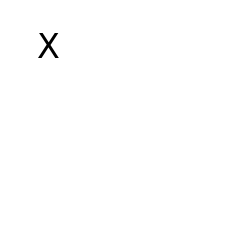

Move: 1 | Visits: 13 | Wins: 9.5


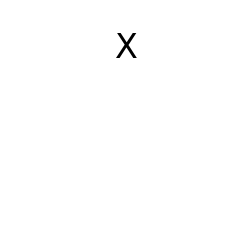

Move: 5 | Visits: 13 | Wins: 9.0


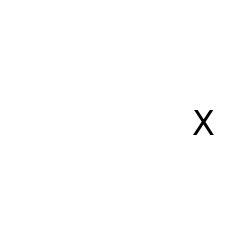

Move: 8 | Visits: 12 | Wins: 7.5


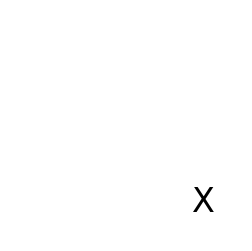

Move: 3 | Visits: 11 | Wins: 7


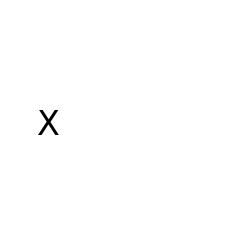

Move: 4 | Visits: 11 | Wins: 7


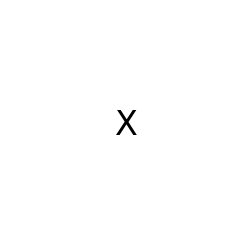

Move: 6 | Visits: 10 | Wins: 5.5


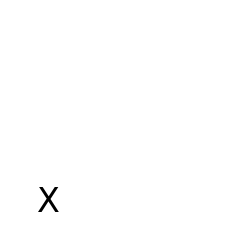

Move: 2 | Visits: 8 | Wins: 4


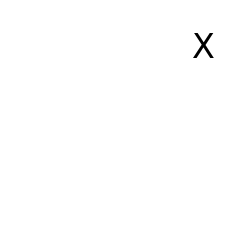

Move: 7 | Visits: 8 | Wins: 3.5


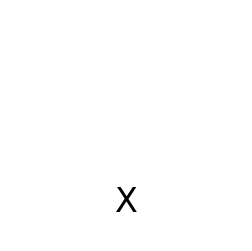

In [ ]:
# Rerun MCTS without priors (classic MCTS) for comparison
pure_root = mcts_search(TicTacToe(), simulations=100)
print("\n📊 Pure MCTS (No Priors) Results:")
for child in sorted(pure_root.children, key=lambda c: c.visits, reverse=True):
    print(f"Move: {child.move} | Visits: {child.visits} | Wins: {round(child.wins, 1)}")
    display_board(child.state.board)